In [1]:
import pandas as pd
import numpy as np
#from scipy.stats import permutation_test
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir = '/mnt/data/2020_Projects/2021_HDP/03_Data/FBCcalc_simbio_fastfield_20subj/'
#dir = '/home/brainstimmaps/RESEARCH/20xx_Projects/2021_HDP/perm_test/'

In [13]:
newdata = 'newdata10/'
best_level_clinical_model_HDP = pd.read_csv(dir + newdata + 'best_level_clinical_model_HDP.csv')
best_level_clinical_model_CST = pd.read_csv(dir + newdata + 'best_level_clinical_model_CST.csv')
best_level_clinical_model_2 = pd.read_csv(dir + newdata + 'best_level_clinical_model_2.csv')
best_level_clinical_model_win = pd.read_csv(dir + newdata + 'best_level_clinical_model_window.csv')

best_contact_clinical_model_HDP = pd.read_csv(dir + newdata + 'best_contact_clinical_model_HDP.csv')
best_contact_clinical_model_CST = pd.read_csv(dir + newdata + 'best_contact_clinical_model_CST.csv')
best_contact_clinical_model_2 = pd.read_csv(dir + newdata + 'best_contact_clinical_model_2.csv')
best_contact_clinical_model_win = pd.read_csv(dir + newdata + 'best_contact_clinical_model_window.csv')

In [4]:
from sklearn.metrics import accuracy_score

def custom_perm(x, y, k, n_perm=100000):

    n_permutations = n_perm
    permute_stat = []

    x_rand = np.random.randint(2, size=len(x))
    np.random.shuffle(x_rand)

    for p in range(n_permutations):
        x_permuted = np.random.permutation(x_rand)
        stat = accuracy_score(y,x_permuted)
        permute_stat.append(stat)

    model_stat = accuracy_score(y,x)
    p_value = 1 - np.sum(permute_stat < model_stat)/len(permute_stat) # upper tailed test
    #p_value = np.sum(permute_mse < model_mse)/len(permute_mse) # lower tailed test

    sns.histplot(permute_stat, kde=True, label='Population')
    plt.title('Sample Distribution', fontsize=18)
    plt.ylabel('Frequency', fontsize=16)

    plt.axvline(x=model_stat, ymin=0, ymax=1, color='red', linestyle='--')

    print(f'Model stat: {model_stat}')
    print(f'n permutations < Model stat = {np.sum(permute_stat < model_stat)}')
    print(f'p-value = {p_value:.3}')

Model stat: 0.6458333333333334
n permutations < Model stat = 99928
p-value = 0.00072


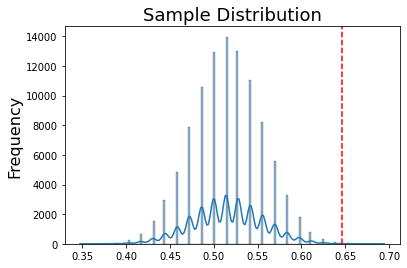

In [5]:
# Best level HDP
x = best_level_clinical_model_HDP.best_model.to_numpy()
y = best_level_clinical_model_HDP.best_clin.to_numpy()
k = best_level_clinical_model_HDP.LeadID.nunique()

custom_perm(x, y, k)

Model stat: 0.5714285714285714
n permutations < Model stat = 99807
p-value = 0.00193


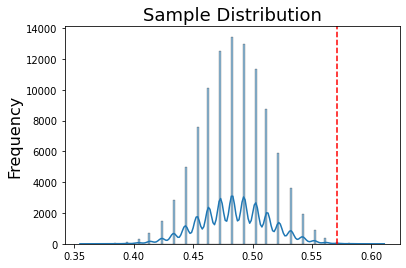

In [6]:
# Best contact HDP
x = best_contact_clinical_model_HDP.best_model.to_numpy()
y = best_contact_clinical_model_HDP.best_clin.to_numpy()
k = best_contact_clinical_model_HDP.LeadID.nunique()

custom_perm(x, y, k)

In [7]:
# Best level 2
x = best_level_clinical_model_2.best_model.to_numpy()
y = best_level_clinical_model_2.best_clin.to_numpy()
k = best_level_clinical_model_2.LeadID.nunique()

custom_perm(x, y, k)

Model stat: 0.6458333333333334
n permutations < Model stat = 99978
p-value = 0.00022


In [8]:
# Best contact 2
x = best_contact_clinical_model_2.best_model.to_numpy()
y = best_contact_clinical_model_2.best_clin.to_numpy()
k = best_contact_clinical_model_2.LeadID.nunique()

custom_perm(x, y, k)

Model stat: 0.5665024630541872
n permutations < Model stat = 99910
p-value = 0.0009


In [9]:
# Best level CST
x = best_level_clinical_model_CST.best_model.to_numpy()
y = best_level_clinical_model_CST.best_clin.to_numpy()
k = best_level_clinical_model_CST.LeadID.nunique()

custom_perm(x, y, k)

Model stat: 0.675
n permutations < Model stat = 100000
p-value = 0.0


In [10]:
# Best contact CST
x = best_contact_clinical_model_CST.best_model.to_numpy()
y = best_contact_clinical_model_CST.best_clin.to_numpy()
k = best_contact_clinical_model_CST.LeadID.nunique()

custom_perm(x, y, k)

Model stat: 0.6650943396226415
n permutations < Model stat = 100000
p-value = 0.0


Model stat: 0.6944444444444444
n permutations < Model stat = 100000
p-value = 0.0


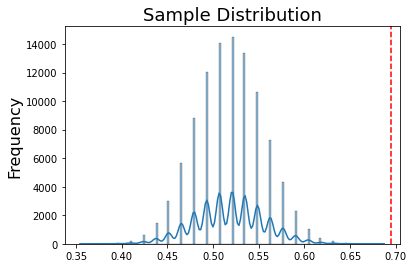

In [14]:
# Best level window
x = best_level_clinical_model_win.best_model.to_numpy()
y = best_level_clinical_model_win.best_clin.to_numpy()
k = best_level_clinical_model_win.LeadID.nunique()

custom_perm(x, y, k)

In [15]:
# Best contact win
x = best_contact_clinical_model_win.best_model.to_numpy()
y = best_contact_clinical_model_win.best_clin.to_numpy()
k = best_contact_clinical_model_win.LeadID.nunique()

custom_perm(x, y, k)

Model stat: 0.6650246305418719
n permutations < Model stat = 100000
p-value = 0.0
